<a href="https://colab.research.google.com/github/noeyxos/MS-AI-SCHOOL/blob/main/AI_04_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clustering

import numpy as np        # clustering을 위한 기본 패키지 불러오기
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings       #간단한 경고메세지는 무시하자
warnings.filterwarnings('ignore')

import os 
from os.path import join    #파일을 가져다 쓸 경우 사용하는 패키지 

In [4]:
from sklearn.datasets import load_wine    # wine data 가져오기 
wine = load_wine()

print(wine.DESCR)     # wine 데이터 내용 확인

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
data =wine.data
label =wine.target
columns = wine.feature_names

data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
from sklearn.preprocessing import MinMaxScaler    #minmax scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[:5]

array([[0.07389273, 0.27558308],
       [0.20031613, 0.44732996],
       [0.17964403, 0.32056714],
       [0.00803763, 0.04526154],
       [0.3616189 , 0.4117368 ]])

In [13]:
from sklearn.decomposition import PCA  #차원의 축소
pca = PCA(n_components=2)       # n_components=2: 2차원으로 축소, 디폴트 값: 2차원
data = pca.fit_transform(data)
data[:5]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657]])

In [15]:
data.shape    # 데이터의 모양

(178, 2)

In [16]:
# K-Means 모델의 활용
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)      # 이미 데이터가 3가지 집합으로 나누어져있다는 것을 알고 있으니까 이렇게 써준다.

kmeans.fit(data)  # n_clusters= 3에 의해 data를 3개의 그룹으로 쪼갠다!

KMeans(n_clusters=3)

In [17]:
cluster = kmeans.predict(data)    #  cluster로 형성한 예측값 확인
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

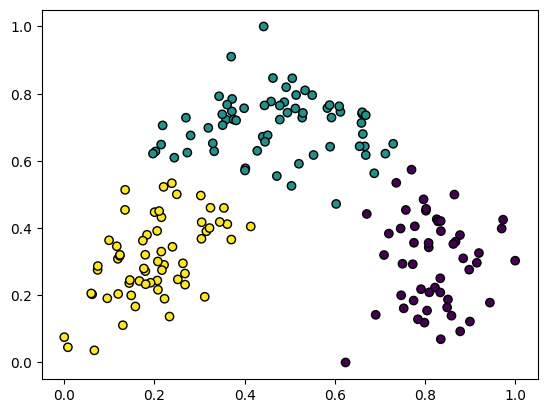

In [21]:
#결과를 쫌 더 잘보기 위해 시각화를 해준다.
plt.scatter(data[:,0],data[:,1],  c=cluster, linewidth = 1, edgecolor = 'black')    #data[:,0] :  x축 ,data[:,1]:  y축, c=cluster: cluster값에 따라 컬러를 다르게 설정

In [26]:
from scipy.cluster.hierarchy import single
# Hierarchical Clustering  :  결과를 보면서 개수를 지정하는 방법
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters = 3, linkage= 'single')   #n_clusters= 3: cluster 개수 지정, linkage= 'single'


single_clustering.fit(data)   #data를 single_clustering 시킴
single_cluster = single_clustering.labels_  # 핏 시킨 라벨데이터 가져오기
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

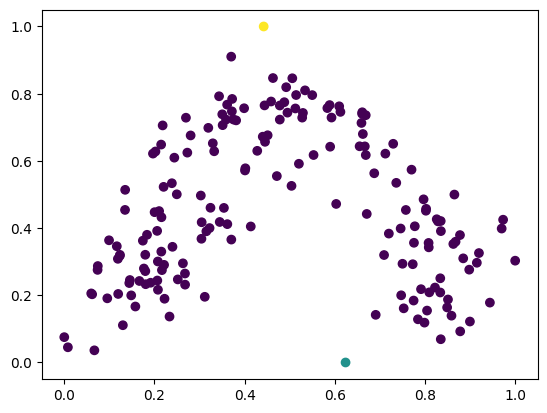

In [27]:
# 산점도
plt.scatter(data[:,0], data[:,1], c= single_cluster)

In [28]:
complete_clustering = AgglomerativeClustering(n_clusters = 3, linkage='complete') #AgglomerativeClustering(): linkage='complete'로 바꿈
complete_clustering.fit(data)
complete_cluster = complete_clustering.labels_
complete_cluster  # 변별력이 조금 더 생긴것을 볼 수 있다. 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

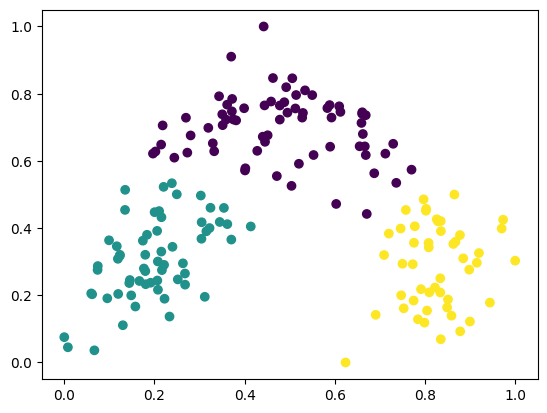

In [29]:
plt.scatter(data[:,0], data[:,1],  c= complete_cluster)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [140.0, 140.0, 176.25, 176.25],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [295.0, 295.0, 321.25, 321.25],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [385.0, 385.0, 395.0, 395.0]

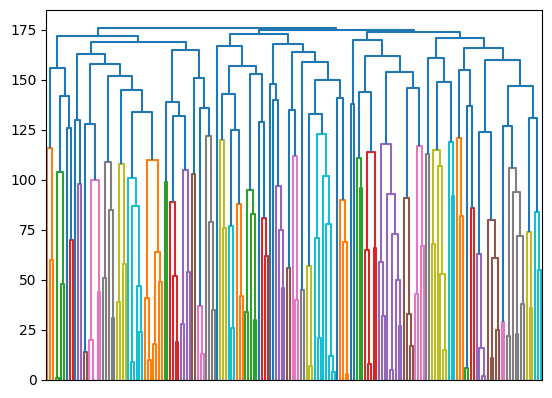

In [31]:
#덴드로그램 (dendrogram) Hierarchical Clustering을 계층적으로 도식화하는 도구
from scipy.cluster.hierarchy import dendrogram      # import dendrogram 실제로 그림을 그려주는 도구

# Hierarchical Cluster의 자식 노드 
children = complete_clustering.children_        #자식 노드 정보 가져옴

distance = np.arange(children.shape[0])

#각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)        # shape[0]+2: index는 = 0부터시작하니까 1 추가, 루트 노트 포함해야되니까 1추가 함.

linkage_matrix = np.column_stack([children,distance, no_of_observations]).astype(float)    #표현하는 matrix만들기 

# 덴드로그램을 그린다. 
dendrogram(linkage_matrix , p = len(data), labels = complete_cluster, show_contracted=True, no_labels =True)

In [39]:
# 가장 좋은 클러스터를 형성하는 클러스터의 수를 찾아보자

from sklearn.metrics import silhouette_score

best_n = -1       # 초기값을 -1로 해주는 것이 관행 !  0 으로 나올 수도 있어서 0 으로 하는 것 보다 -1 으로 많이 한다. 
best_score = -1 

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)

  #실루엣 점수를 본다. 
  score =silhouette_score(data, cluster) 

  print('Cluster count : {} Silhouette Score : {: .2f}'.format(n_cluster, score) )

  if score > best_score :
    best_n = n_cluster 
    best_score = score 

print('\n----------------------------------------------------------------------------\n')
print('Best n_cluster: {} Silhoutette Score : {:.2f}'.format(best_n,best_score))

Cluster count : 2 Silhouette Score :  0.46
Cluster count : 3 Silhouette Score :  0.58
Cluster count : 4 Silhouette Score :  0.50
Cluster count : 5 Silhouette Score :  0.44
Cluster count : 6 Silhouette Score :  0.44
Cluster count : 7 Silhouette Score :  0.42
Cluster count : 8 Silhouette Score :  0.40
Cluster count : 9 Silhouette Score :  0.37
Cluster count : 10 Silhouette Score :  0.42

----------------------------------------------------------------------------

Best n_cluster: 3 Silhoutette Score : 0.58
